In [1]:
import pandas as pd
import datetime
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Cambiar las siguientes fechas para que concidan con las descargadas.
inicio = datetime.datetime(2019,2,6) 
fin    = datetime.datetime(2020,9,4)

lista_fechas = [(inicio + datetime.timedelta(days=d)).strftime("%d %m %Y")
                    for d in range((fin - inicio).days + 1)]

In [3]:
todo = pd.read_csv(lista_fechas[1])
todo=todo.drop(columns=["Symbol/ISIN","Valor local","Cantidad","Precio de","Valor en EUR"])

In [4]:
for i in range(len(lista_fechas)):
    x = lista_fechas[i]
    wh2=pd.read_csv(x, decimal=",")
    wh2=wh2.drop(columns=["Symbol/ISIN","Valor local","Cantidad","Precio de"])    
    b = lista_fechas[i]
    objDate = datetime.datetime.strptime(b, '%d %m %Y')
    fecha = datetime.datetime.strftime(objDate, '%d %b %Y')
    wh2 = wh2.rename(columns={'Valor en EUR':fecha})
    todo= pd.merge(todo, wh2, on="b'Producto", how="outer")

todoCash = todo.copy()


In [5]:
compras = pd.read_csv("Account.csv", decimal= ",")
listaunica = compras["ISIN"].dropna().unique().tolist()


In [6]:
alex = todo["b'Producto"]
alex3 = compras[compras['Descripción'].str.contains("alejandro", regex=False, case=False, na=False)]
for x in range(len(listaunica)):
    alex2 = compras[compras['ISIN'].str.contains(listaunica[x], regex=False, case=False, na=False)]
    alex3 = pd.concat([alex3, alex2])

In [7]:
alex3comp = alex3[alex3['Descripción'].str.contains("Compra", regex=False, case=False, na=False)]
alex3comp = alex3comp[~alex3comp.Descripción.str.contains("Conversión")]
alex3comp = alex3comp[~alex3comp.Descripción.str.contains("Comisión")]
alex3comp = alex3comp[~alex3comp.Descripción.str.contains("SPLIT")]

In [8]:
todo=todo.transpose().reset_index()
#cambia de labels de las columnas
todo.columns = todo.iloc[0]
todo = todo.drop(todo.index[0])
todo.rename(columns={"b'Producto":'Fecha'}, inplace=True)

In [9]:
todo["Fecha"] =  pd.to_datetime(todo["Fecha"], format='%d %b %Y')

In [10]:
todosuma=todo.iloc[:,1:]
todo["suma"]=todosuma.sum(axis=1)

In [11]:
alex3comp['Fecha valor'] =  pd.to_datetime(alex3comp['Fecha valor'], format='%d-%m-%Y')

alex3comp.rename(columns={"Fecha":'Fecha2'}, inplace=True)
alex3comp.rename(columns={"Fecha valor":'Fecha'}, inplace=True)

alex3comp =alex3comp.sort_values(['Fecha'])

grafico_anotacion= pd.merge(alex3comp, todo, on="Fecha")

grafico_anotacion= grafico_anotacion.drop_duplicates(subset=['ISIN'], keep='first')

In [12]:
##Ingresos
ingresos=pd.read_csv("Account.csv", decimal=",")
ingresos2 = ingresos[ingresos["Descripción"]== "Ingreso"]

ingresos2.rename(columns={"Fecha":'Fecha2'}, inplace=True)
ingresos2.rename(columns={"Fecha valor":'Fecha'}, inplace=True)

ingresos2['Fecha'] =  pd.to_datetime(ingresos2['Fecha'], format='%d-%m-%Y')
#fecha = datetime.datetime.strftime(objDate, '%d %b %Y')
ingresos2 = ingresos2.sort_values(['Fecha'])
ingresos2["sumatotal"] =np.cumsum(ingresos2["Unnamed: 8"])
ingresos2["Fecha"] =  pd.to_datetime(ingresos2["Fecha"], format='%d %b %Y')

todosum = todo
ingresos3 = ingresos2[['Fecha', 'sumatotal']]
todosum = pd.merge(ingresos3, todosum, on="Fecha", how="outer")
todosum = todosum.sort_values(['Fecha'])
todosum.sumatotal = todosum.sumatotal.fillna(method='ffill')
todosum["rentabilidad"]= (todosum["suma"]-todosum["sumatotal"])*100/todosum["sumatotal"]


/home/alexp/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/alexp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


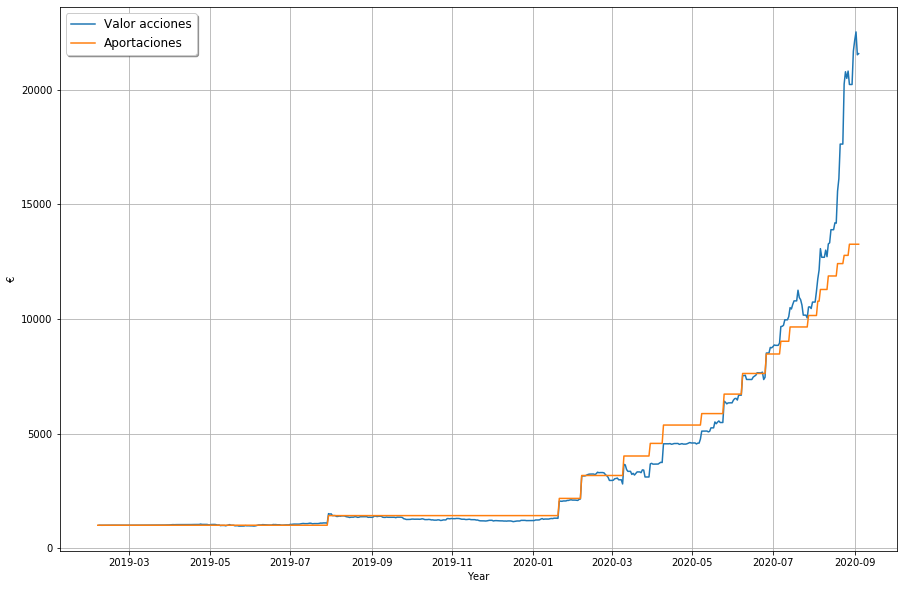

In [13]:
#plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.plot(todo["Fecha"], todo["suma"], label ="Valor acciones")
plt.plot(todosum["Fecha"], todosum["sumatotal"], label = "Aportaciones")
#plt.xticks(todo.Fecha[::20])

plt.legend(fontsize="large", shadow= True)
plt.rcParams.update({'font.size': 14})
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("€")

plt.show()

In [14]:
grafico_anotacion["suma"].iloc[1]

1033.58

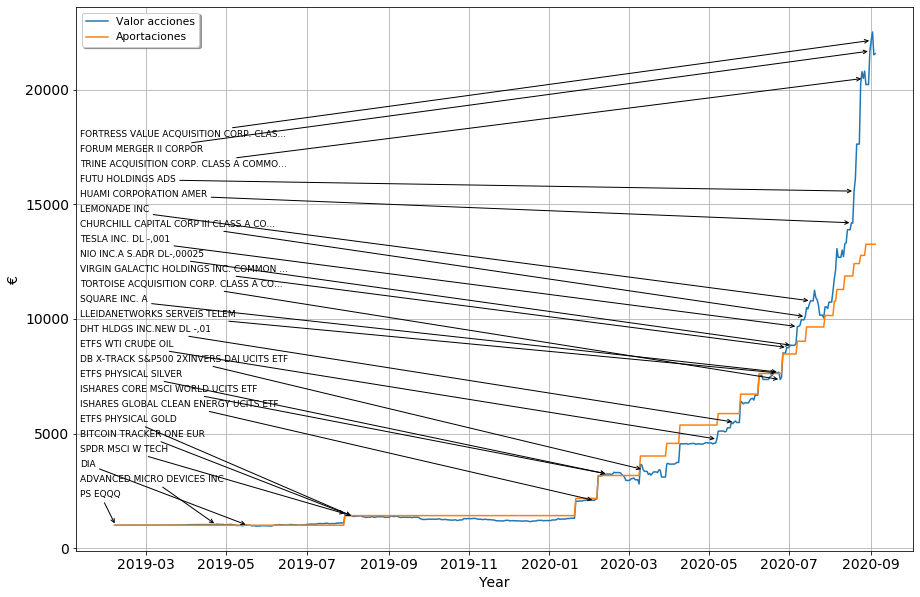

In [15]:
fig_2, axes = plt.subplots(1,1, figsize=(15,10))

axes.plot(todo["Fecha"], todo["suma"], label ="Valor acciones")
axes.plot(todosum["Fecha"], todosum["sumatotal"], label = "Aportaciones")
axes = plt.grid(True)
plt.rcParams.update({'font.size': 9})

for i in range(grafico_anotacion.shape[0]):
    a= 100+i*15
    plt.annotate(grafico_anotacion.iloc[i,3], xy=(grafico_anotacion.iloc[i,2], grafico_anotacion["suma"].iloc[i]),  xycoords='data',
                xytext=(80, a), textcoords='figure points',
                arrowprops=dict(arrowstyle="->"))

plt.legend(fontsize="large", shadow= True)    
plt.xlabel("Year")
plt.ylabel("€")    
    
plt.show()

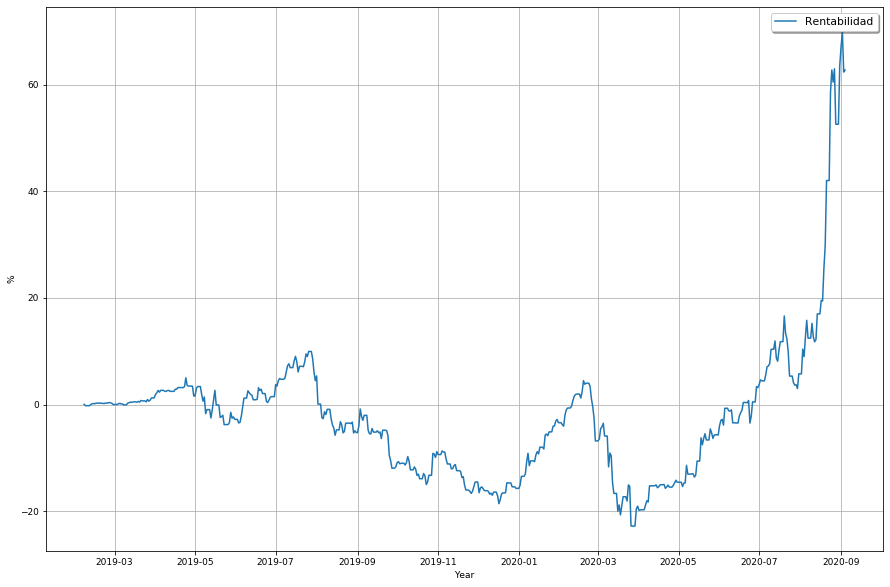

In [16]:
plt.figure(figsize=(15,10))
plt.plot(todosum["Fecha"], todosum["rentabilidad"], label ="Rentabilidad")

plt.legend(fontsize="large", shadow= True)
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("%")

plt.show()

# Create some mock data
Fecha1 = todo["Fecha"]
Suma1 = todo["suma"]
Fecha2 = todosum["Fecha"]
Sumatotal1 = todosum["sumatotal"]
rentabilidad1 = todosum["rentabilidad"]

plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('€', color=color)
ax1.plot(Fecha1, Suma1, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(Fecha1, rentabilidad1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

from bokeh.plotting import figure, output_file, show 

#file to save the model 
output_file("hola.html") 
 
# instantiating the figure object 
graph = figure(title = "Beneficios") 
  
# name of the x-axis 
graph.xaxis.axis_label = "Fecha"
  
# name of the y-axis 
graph.yaxis.axis_label = "€"
  
# plotting line 1 
line_color = "red"
line_dash = "solid"
legend_label = "Line 1"
  
# plotting the line 
graph.line(todo["Fecha"], todo["suma"], 
           line_color = line_color, 
           line_dash = line_dash, 
           legend_label = legend_label) 
  
# plotting line 2 
line_color = "green"
line_dash = "dotdash"
line_dash_offset = 1
legend_label = "Line 2"
  
# plotting the line 
graph.line(todosum["Fecha"], todosum["sumatotal"], 
           line_color = line_color, 
           line_dash = line_dash, 
           line_dash_offset = line_dash_offset, 
           legend_label = legend_label) 
   
# displaying the model 
show(graph) 

#Cantidad
todo2 = pd.read_csv(lista_fechas[1])
todo2=todo2.drop(columns=["Symbol/ISIN","Valor local","Cantidad","Precio de","Valor en EUR"])
for i in range(len(lista_fechas)):
    x = lista_fechas[i]
    wh2=pd.read_csv(x, decimal=",")
    wh2=wh2.drop(columns=["Symbol/ISIN","Valor local","Precio de","Valor en EUR"])    
    b = lista_fechas[i]
    objDate = datetime.datetime.strptime(b, '%d %m %Y')
    fecha = datetime.datetime.strftime(objDate, '%d %b %Y')
    wh2 = wh2.rename(columns={'Cantidad':fecha})

    todo2= pd.merge(todo2, wh2, on="b'Producto", how="outer")
todo2.set_index("b'Producto", inplace =True)
todo2= todo2.diff(axis=1)
todo2 = todo2.replace(0,np.NaN)
todo2 = todo2.dropna(axis=1, how='all')
todo2